# 1. Introducción teórica

www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

Un **árbol de decisión** en ML es un tipo de modelo que se genera siguiendo una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado. 

Se usan principalmente en problemas de clasificación, aunque también pueden utilizarse en problemas de regresión.

Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.

Conceptualmente lo que hacen es dividir el conjunto de datos de forma jerárquica en subconjuntos de menor tamaña hasta llegar a trozos donde los ejemplos son todos, o casi todos de la misma clase. Los datos se dividen a partir de los valores de los atributos, de hecho suele usarse un único atributo en cada división.

¿Qué atributos se utilizan para dividir? Para construir el árbol se asigna a cada nodo el atributo más apropiado, que será aquel que mejor distingue las instancias de una o varias clases (el que mejor discrimina).

*Ventajas*: son fáciles de implementar y permiten seleccionar las variables más importantes
*Inconvenientes*: tendencia a overfitting, influenciados por outliers y pueden ser resultar sesgados si una de las clases es más numerosa



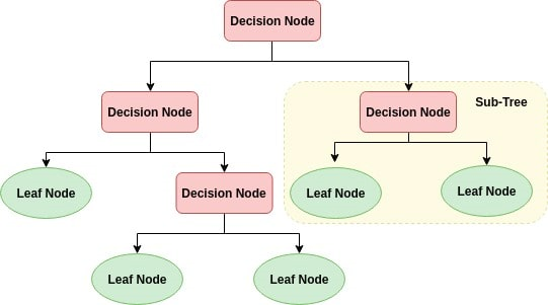

- **Nodo raíz:** Representa a toda la población o muestra y produce la primera división según la variable más importante
- **Nodos intermedios:** tras la primera división encontramos estos nodos, que vuelven a dividir el conjunto de datos en función de las variables.
- **Nodo de hoja / terminal:** nodos sin división adicional, indican la clasificación definitiva.
- **División:** Es un proceso de división de un nodo en dos o más subnodos.  
- **Poda:** Cuando reducimos el tamaño de los árboles de decisión eliminando nodos (opuesto a la división), el proceso se llama poda.
- **Rama / Subárbol:** Una subsección del árbol de decisión se denomina rama o subárbol.
- **Profundidad:** número máximo de nodos de una rama.


### Regression Trees vs Classification Trees


 - Regression trees are used when dependent variable is continuous. Classification trees are used when dependent variable is categorical.
 - In case of regression tree, the value obtained by terminal nodes in the training data is the mean response of observation falling in that region. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mean value.
 - In case of classification tree, the value (class) obtained by terminal node in the training data is the mode of observations falling in that region. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mode value.
 - Both the trees divide the predictor space (independent variables) into distinct and non-overlapping regions. For the sake of simplicity, you can think of these regions as high dimensional boxes or boxes.
 - Both the trees follow a top-down greedy approach known as recursive binary splitting. We call it as ‘top-down’ because it begins from the top of tree when all the observations are available in a single region and successively splits the predictor space into two new branches down the tree. It is known as ‘greedy’ because, the algorithm cares (looks for best variable available) about only the current split, and not about future splits which will lead to a better tree.
 - This splitting process is continued until a user defined stopping criteria is reached. For example: we can tell the the algorithm to stop once the number of observations per node becomes less than 50.
 - In both the cases, the splitting process results in fully grown trees until the stopping criteria is reached. But, the fully grown tree is likely to overfit data, leading to poor accuracy on unseen data. This bring ‘pruning’. Pruning is one of the technique used tackle overfitting. We’ll learn more about it in following section.




## 1.1 Algoritmos

**ID3** - El algoritmo crea un árbol de múltiples vías, encontrando para cada nodo la característica categórica (no admite datos numéricos) que producirá la mayor ganancia de información para los objetivos categóricos. Los árboles crecen hasta su tamaño máximo y luego se suele aplicar un paso de poda para mejorar la capacidad del árbol de generalizar.

**C4.5** - Es el sucesor de ID3 y elimina la restricción de que la variables deben ser categóricas. Convierte los árboles entrenados en conjuntos de reglas if-then. Crea automáticamente puntos de corte en el rango de valores nume´ricos del atributo. Luego, se evalúa la precisión de cada regla para determinar el orden en el que deben aplicarse. La poda se realiza eliminando la condición previa de una regla si la precisión de la regla mejora sin ella. Este algoritmo extrae todas las reglas posibles del algoritmo y las ordena por su eficacia, de mayor a menor, podando aquellas que empeoran la eficacia del algoritmo.

**C5.0** -Usa menos memoria y construye conjuntos de reglas más pequeños que el anterior a la vez que es más preciso.

**CART** - Similar al anterior pero admite variables objetivo numéricas y no obtiene conjuntos de reglas. Se puede utilizar para tareas de clasificación y de regresión. Construye árboles binarios utilizando la característica y el umbral que producen la mayor ganancia de información en cada nodo.

https://bookdown.org/content/2031/arboles-de-decision-parte-i.html#como-decide-un-arbol-donde-ramificarse

# 2. Decision Tree Regressor

https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda

In [ ]:
# Importar librerías y dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values

In [ ]:
# Dividimos en conjunto de train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [ ]:
# Instanciamos la clase DecisionTreeRegressor y entrenamos el modelo
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

In [ ]:
# Predecimos los resultados

y_pred = regressor.predict(X_test.reshape(-1,1))

In [ ]:
# Comparamos los resultados observados con los pred
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

In [ ]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

# 3. Decision Tree Classifier

In [ ]:
seed = 42

In [ ]:
datos_iris = datasets.load_iris()
X_iris = datos_iris.data
y_iris = datos_iris.target
predictors = datos_iris.feature_names

In [ ]:
predictors

In [ ]:
X_iris.shape, y_iris.shape

In [ ]:
# Métricas
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
                                  average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
                               average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')
}

In [ ]:
# Estandarización de los datos

standardizer = preprocessing.StandardScaler()
X_iris_st = standardizer.fit_transform(X_iris)

In [ ]:
algoritmos = {'DT': tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)}

In [ ]:
# Validación cruzada y Opt. hiperparámetros

y_pred = cross_val_predict(algoritmos['DT'], X_iris_st, y_iris, 
                                       cv=KFold(n_splits=10, shuffle=True, random_state=seed))

In [ ]:
# Función evaluación
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = funcion(y_true, y_pred)
    return res

In [ ]:
# Métricas

results = evaluacion(y_iris, y_pred,metricas)
print("Matriz de confusión (%s):\n%s" ,(metrics.confusion_matrix(y_iris, y_pred)), '\n')
print("Tabla de métricas (%s):\n%s" , (metrics.classification_report(y_iris, y_pred, digits=3)))


In [ ]:
def mapa_modelo_clasif_2d(X, y, modelo, metricas, algoritmo):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,16))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("%s\nACC: %.3f  PREC: %.3f  RECALL: %.3f  F1: %.3f" %
              (algoritmo,metricas['ACC'],metricas['PREC'],metricas['RECALL'],metricas['F1']), fontsize=28)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(modelo.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    if (hasattr(modelo, 'coef_')):
        xmin, xmax = plt.xlim()
        ymin, ymax = plt.ylim()
        coef = modelo.coef_
        intercept = modelo.intercept_

        def plot_hyperplane(c, color):
            def line(x0):
                return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

            plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                     ls="--", color=color)

        for i, color in zip(modelo.classes_, colors):
            plot_hyperplane(i, color)

    plt.show()

In [ ]:
# Entrenamiento modelo definitivo

modelo = algoritmos['DT'].fit(X_iris_st[:,:2], y_iris)
mapa_modelo_clasif_2d(X_iris_st[:,:2], y_iris, modelo, results,algoritmos['DT'])

In [ ]:
from sklearn.tree import export_graphviz
import os
import os
from graphviz import Source

In [ ]:
with open("./my_decision.dot", "w") as dotfile:
    export_graphviz(modelo, out_file=dotfile, feature_names=predictors[0:2])
    dotfile.close()


In [ ]:
file = open("./my_decision.dot", "r")
text = file.read()
text

In [ ]:
Source(text)

# 4. Ensemble methods y Random Forest

https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/

**Ensemble** se refiere a un conjunto de estrategias de combinación de modelos de ML utilizados para resolver un mismo problema y donde cada modelo produce una predicción diferente. Estas predicciones se combinarán para obtener el resultado final.

La principal de la combinación de  modelos diferentes es que los errores tienden a compensarse, y por lo tanto, generalizarán mejor.

Hay varias formas de construir estos ensembles:

- Votación por mayoría
- Bagging: implica ajustar muchos árboles de decisión en diferentes muestras del mismo conjunto de datos y promediar las predicciones.
- Boosting: agregar miembros del conjunto secuencialmente que corrigen las predicciones hechas por modelos anteriores y genera un promedio ponderado de las predicciones.
- Stacking: implica ajustar muchos tipos de modelos diferentes en los mismos datos y usar otro modelo para aprender a combinar mejor las predicciones.

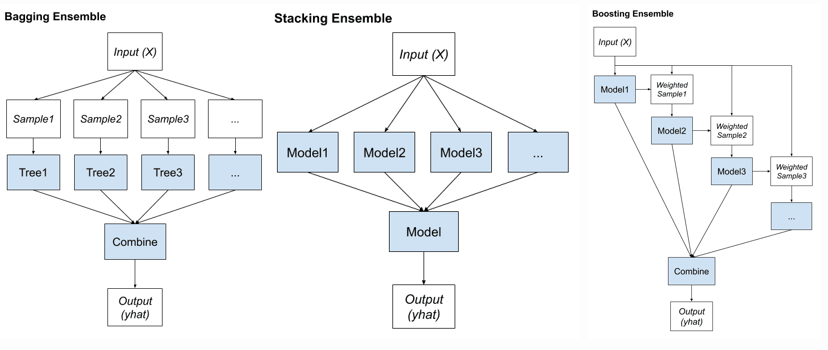


Un **random forest** es un conjunto de árboles de decisión combinados con bagging.

Al usar bagging cada árbol entrena con distintas partes del conjunto de entrenamiento, por lo que al combinar sus resultados, unos errores “compensan” otros y el modelo va a generalizar mejor.

Un conjunto de modelos se combinan formando un modelo mucho más robusto.

https://www.aprendemachinelearning.com/random-forest-el-poder-del-ensamble/